In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os

sys.path.append(os.path.abspath('..'))

from CfModels.order_methods import static_twin_with_missing

GTB (2013) Experiment 2

## Import all Data

- Experimental data
- CV Fits (L-BFGS-B)
- Full Fits (BFGS)

In [2]:
# Experiment data
exp2_data = pd.read_csv('../../../data/data_2/experiment_2.csv')

# Cross validation data load
import glob
import pickle

results_dir = '../fitting/results/'

# Load all cross-validation pickle files
# cv_files = glob.glob(results_dir + 'cross_validation/exp2_cond_l-bfgs-b/*.pkl')
cv_files = glob.glob(results_dir + 'cross_validation/exp2_cond_bfgs/*.pkl')

cv_results = {}
for file_path in cv_files:
    # Extract the filename without path and extension
    filename = file_path.split('/')[-1].replace('.pkl', '')
    # trim exp2_xval_ from the start
    filename = filename.replace('exp2_xval_', '')

    # skip if 'power' or '_.pkl' in filename
    if 'power' in filename or filename[-1] == '_' or 'summary' in filename:
        continue
    
    # Load the pickle file
    with open(file_path, 'rb') as f:
        cv_results[filename] = pickle.load(f)
print(f"Loaded {len(cv_results)} cross-validation results:")

# Load all the fit files:
fit_files = glob.glob(results_dir + 'exp2_bfgs/*.pkl')

fit_results_bfgs = {}
for file_path in fit_files:
    # Extract the filename without path and extension
    filename = file_path.split('/')[-1].replace('.pkl', '')
    # trim exp2_fit_ from the start
    filename = filename.replace('exp2_fit_', '')
    
    # Load the pickle file
    with open(file_path, 'rb') as f:
        fit_results_bfgs[filename] = pickle.load(f)
print(f"Loaded {len(fit_results_bfgs)} fitting results (BFGS).")



Loaded 60 cross-validation results:
Loaded 60 fitting results (BFGS).


## Compute  Metrics 

In [3]:
# n_data = len(exp2_data)*3 # 3 responses per participant
n_data = (exp2_data[['A', 'C', 'D']].apply(abs).values.flatten()>0).sum() # only count non-zero responses

model_comparison = {}
for model,fit_data in fit_results_bfgs.items():
    if model in cv_results:
        fit = fit_results_bfgs[model]
        cv = cv_results[model]
        nll = fit['nll']
        k = fit['optimization_result'].x.shape[0]
        aic = 2*nll + 2*k
        bic = 2*nll + k*np.log(n_data)
        model_comparison[model] = {
            'fit_nll': nll,
            'cv_nll': np.mean(cv['test_nlls']),
            'n_params': fit['optimization_result'].x.shape[0],
            'aic': aic,
            'bic': bic
        }

## Model Comparisons

In [4]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison, orient='index')
model_comparison_df.reset_index(inplace=True)
model_comparison_df.rename(columns={'index': 'model'}, inplace=True)
model_comparison_df = model_comparison_df.sort_values(by='cv_nll')
model_comparison_df

,model,fit_nll,cv_nll,n_params,aic,bic
53,BC_full,502.028785,64.623195,10,1024.057571,1071.101714
59,BC_source_target,503.693959,64.998147,8,1023.387918,1061.023233
45,BC_source_target_p1,509.206927,64.998543,7,1032.413853,1065.344754
39,betas_cp,504.173172,65.073629,8,1024.346344,1061.981659
31,betas_source_target,502.962185,65.287448,9,1023.924370,1066.264099
6,full,502.047813,65.559035,11,1026.095627,1077.844185
44,BC_p1,518.488499,65.755132,5,1046.976997,1070.499069
32,BC_cp_p1,515.526733,65.896866,6,1043.053466,1071.279952
57,BC_cp,508.014135,65.932563,7,1030.028270,1062.959171
49,betas_cp_p1,514.050581,66.184827,7,1042.101161,1075.032062


In [5]:
# Best fitting aic models
model_comparison_df.sort_values(by='aic').head(5)

,model,fit_nll,cv_nll,n_params,aic,bic
59,BC_source_target,503.693959,64.998147,8,1023.387918,1061.023233
31,betas_source_target,502.962185,65.287448,9,1023.924370,1066.264099
53,BC_full,502.028785,64.623195,10,1024.057571,1071.101714
39,betas_cp,504.173172,65.073629,8,1024.346344,1061.981659
6,full,502.047813,65.559035,11,1026.095627,1077.844185


In [6]:
# Best fitting bic models
model_comparison_df.sort_values(by='bic').head(5)

,model,fit_nll,cv_nll,n_params,aic,bic
59,BC_source_target,503.693959,64.998147,8,1023.387918,1061.023233
39,betas_cp,504.173172,65.073629,8,1024.346344,1061.981659
57,BC_cp,508.014135,65.932563,7,1030.028270,1062.959171
3,BC,511.489888,77.664778,6,1034.979777,1063.206263
45,BC_source_target_p1,509.206927,64.998543,7,1032.413853,1065.344754


In [7]:
# best fitting models cv_nll
model_comparison_df.head(5)

,model,fit_nll,cv_nll,n_params,aic,bic
53,BC_full,502.028785,64.623195,10,1024.057571,1071.101714
59,BC_source_target,503.693959,64.998147,8,1023.387918,1061.023233
45,BC_source_target_p1,509.206927,64.998543,7,1032.413853,1065.344754
39,betas_cp,504.173172,65.073629,8,1024.346344,1061.981659
31,betas_source_target,502.962185,65.287448,9,1023.924370,1066.264099


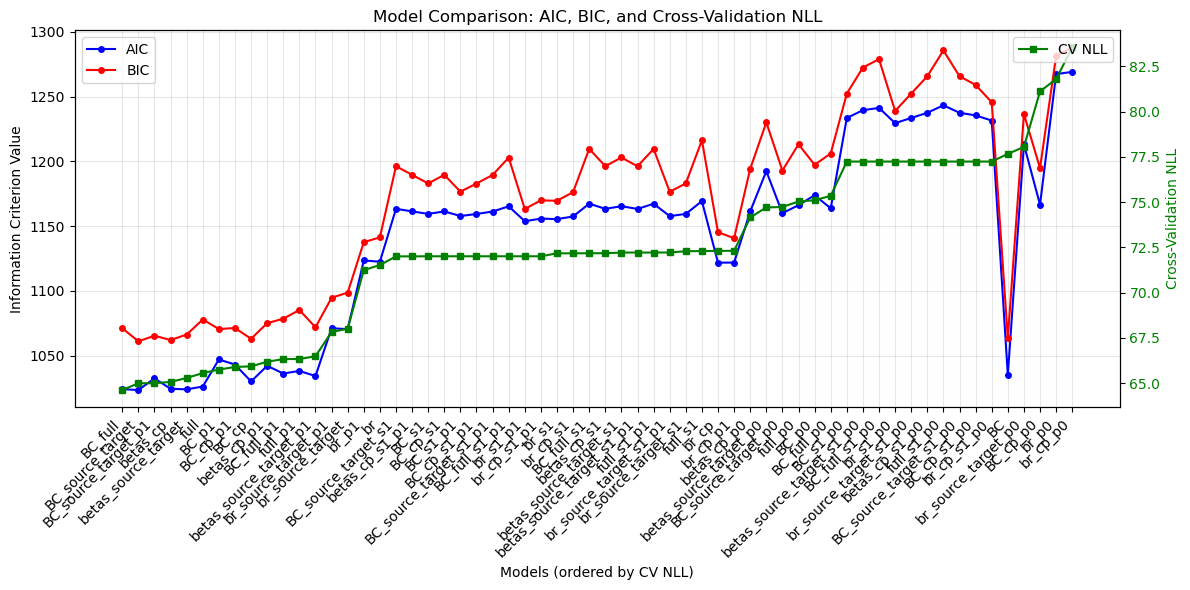

In [8]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

# Plot AIC and BIC on the primary y-axis
ax1.plot(range(len(model_comparison_df)), model_comparison_df['aic'], 'b-o', markersize=4, label='AIC')
ax1.plot(range(len(model_comparison_df)), model_comparison_df['bic'], 'r-o', markersize=4, label='BIC')
ax1.set_ylabel('Information Criterion Value', color='black')
ax1.set_xlabel('Models (ordered by CV NLL)')
ax1.grid(True, alpha=0.3)

# Create secondary y-axis for CV NLL
ax2 = ax1.twinx()
ax2.plot(range(len(model_comparison_df)), model_comparison_df['cv_nll'], 'g-s', markersize=4, label='CV NLL')
ax2.set_ylabel('Cross-Validation NLL', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set x-axis labels with model names (rotated for readability)
ax1.set_xticks(range(len(model_comparison_df)))
ax1.set_xticklabels(model_comparison_df['model'], rotation=45, ha='right')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_title('Model Comparison: AIC, BIC, and Cross-Validation NLL')
plt.tight_layout()
plt.show()


In [9]:
# Get top 3 models by each criterion
top_aic = model_comparison_df.nsmallest(3, 'aic')['model'].tolist()
top_bic = model_comparison_df.nsmallest(3, 'bic')['model'].tolist()
top_cv = model_comparison_df.nsmallest(3, 'cv_nll')['model'].tolist()

# Combine all top models (remove duplicates)
top_models = list(set(top_aic + top_bic + top_cv))

# Filter dataframe to only include top models
top_models_df = model_comparison_df[model_comparison_df['model'].isin(top_models)]
top_models_df = top_models_df.sort_values(by='cv_nll')
top_models_df

,model,fit_nll,cv_nll,n_params,aic,bic
53,BC_full,502.028785,64.623195,10,1024.057571,1071.101714
59,BC_source_target,503.693959,64.998147,8,1023.387918,1061.023233
45,BC_source_target_p1,509.206927,64.998543,7,1032.413853,1065.344754
39,betas_cp,504.173172,65.073629,8,1024.346344,1061.981659
31,betas_source_target,502.962185,65.287448,9,1023.924370,1066.264099
57,BC_cp,508.014135,65.932563,7,1030.028270,1062.959171


In [11]:
# reorder columns as [['model', 'nll', 'cv_nll','aic','bic','n_params']]
top_models_df = top_models_df[['model', 'fit_nll', 'cv_nll', 'aic', 'bic', 'n_params']]
print(top_models_df.round(1))
# print table as a raw tabular format (latex)
for index, row in top_models_df.iterrows():
    print(f"{row['model']} & {row['fit_nll']:.1f} & {row['cv_nll']:.1f} & {row['aic']:.1f} & {row['bic']:.1f} & {row['n_params']} \\\\")

                  model  fit_nll  cv_nll     aic     bic  n_params
53              BC_full    502.0    64.6  1024.1  1071.1        10
59     BC_source_target    503.7    65.0  1023.4  1061.0         8
45  BC_source_target_p1    509.2    65.0  1032.4  1065.3         7
39             betas_cp    504.2    65.1  1024.3  1062.0         8
31  betas_source_target    503.0    65.3  1023.9  1066.3         9
57                BC_cp    508.0    65.9  1030.0  1063.0         7
BC_full & 502.0 & 64.6 & 1024.1 & 1071.1 & 10 \\
BC_source_target & 503.7 & 65.0 & 1023.4 & 1061.0 & 8 \\
BC_source_target_p1 & 509.2 & 65.0 & 1032.4 & 1065.3 & 7 \\
betas_cp & 504.2 & 65.1 & 1024.3 & 1062.0 & 8 \\
betas_source_target & 503.0 & 65.3 & 1023.9 & 1066.3 & 9 \\
BC_cp & 508.0 & 65.9 & 1030.0 & 1063.0 & 7 \\


## Grouped boxplot

In [12]:
pearl_p = model_comparison_df[(model_comparison_df['model'].isin(['s1'])) & ~(model_comparison_df['model']).isin(['p0'])]
pearl_p0 = model_comparison_df[(model_comparison_df['model'].isin(['s1_p0']))]
backtracking_p = model_comparison_df[~(model_comparison_df['model'].isin(['s1'])) & ~(model_comparison_df['model']).isin(['p0'])]
backtracking_p0 = model_comparison_df[~(model_comparison_df['model'].isin(['s1'])) & (model_comparison_df['model']).isin(['p0'])]

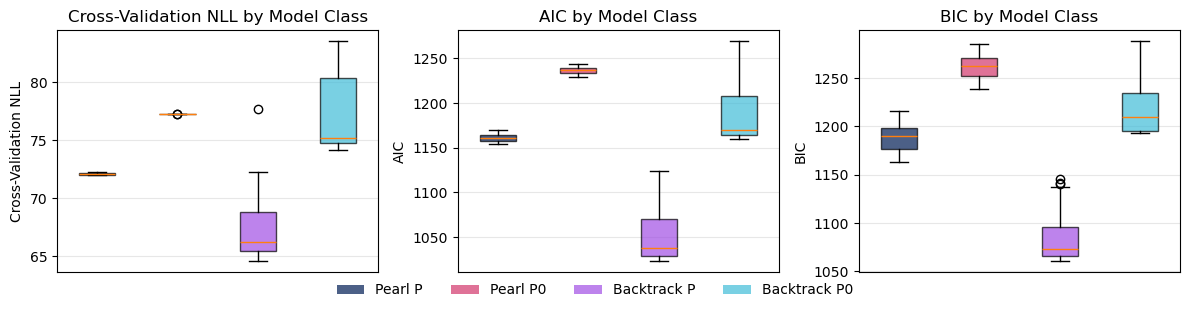

In [13]:
# Create figure with 3 subplots for the boxplots
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Define the metrics and their labels
metrics = ['cv_nll', 'aic', 'bic']
metric_labels = ['Cross-Validation NLL', 'AIC', 'BIC']

# Use the colorblind-friendly palette
colors = ['#001C55',
            '#d2376b',
            '#A14EE4',
            '#40BCD8']

# Create the model groups with proper filtering
# Pearl models: contain 's1' but not 'p0'
pearl_p = model_comparison_df[model_comparison_df['model'].str.contains('s1') & 
                             ~model_comparison_df['model'].str.contains('p0')]

# Pearl p0 models: contain both 's1' and 'p0'
pearl_p0 = model_comparison_df[model_comparison_df['model'].str.contains('s1') & 
                              model_comparison_df['model'].str.contains('p0')]

# Backtracking models: don't contain 's1' and don't contain 'p0'
backtracking_p = model_comparison_df[~model_comparison_df['model'].str.contains('s1') & 
                                   ~model_comparison_df['model'].str.contains('p0')]

# Backtracking p0 models: don't contain 's1' but contain 'p0'
backtracking_p0 = model_comparison_df[~model_comparison_df['model'].str.contains('s1') & 
                                    model_comparison_df['model'].str.contains('p0')]

# For each metric, create a boxplot
for i, (metric, label) in enumerate(zip(metrics, metric_labels)):
    ax = axes[i]
    
    # Prepare data for boxplot
    data = []
    labels = []
    box_colors = []
    
    # Add all four groups
    if len(pearl_p) > 0:
        data.append(pearl_p[metric].values)
        labels.append('Pearl P')
        box_colors.append(colors[0])
    
    if len(pearl_p0) > 0:
        data.append(pearl_p0[metric].values)
        labels.append('Pearl P0')
        box_colors.append(colors[1])
        
    if len(backtracking_p) > 0:
        data.append(backtracking_p[metric].values)
        labels.append('Backtrack P')
        box_colors.append(colors[2])
    
    if len(backtracking_p0) > 0:
        data.append(backtracking_p0[metric].values)
        labels.append('Backtrack P0')
        box_colors.append(colors[3])
    
    # Create boxplot with colors
    if data:  # Only plot if we have data
        bp = ax.boxplot(data, patch_artist=True)
        
        # Apply colors to boxes
        for patch, color in zip(bp['boxes'], box_colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        ax.set_title(f'{label} by Model Class')
        ax.set_ylabel(label)
        ax.grid(True, alpha=0.3)
        
        # Remove x-axis labels since we'll have a legend
        ax.set_xticks([])
        
    else:
        ax.text(0.5, 0.5, 'No data available', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{label} by Model Class')

# Add single legend below all plots
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, alpha=0.7) 
                  for color in colors]
legend_labels = ['Pearl P', 'Pearl P0', 'Backtrack P', 'Backtrack P0']

fig.legend(legend_elements, legend_labels, loc='lower center', 
           bbox_to_anchor=(0.5, -0.05), ncol=4, frameon=False)

plt.tight_layout()
plt.show()

### Comparing BC_full models

In [14]:
BC_full_df = model_comparison_df[(model_comparison_df['model'].str.contains('BC_full')) & #BC_full models
                     (~model_comparison_df['model'].str.contains('p1')) # Exclude p1 ablation for paper
                     ]

for index, row in BC_full_df.iterrows():
    print(f"{row['model']} & {row['fit_nll']:.1f} & {row['cv_nll']:.1f} & {row['aic']:.1f} & {row['bic']:.1f} & {row['n_params']} \\\\")

BC_full & 502.0 & 64.6 & 1024.1 & 1071.1 & 10 \\
BC_full_s1 & 574.7 & 72.2 & 1167.3 & 1209.7 & 9 \\
BC_full_p0 & 572.9 & 75.4 & 1163.7 & 1206.0 & 9 \\
BC_full_s1_p0 & 612.6 & 77.2 & 1241.3 & 1278.9 & 8 \\


In [15]:
BC_full_params = {m: f['fitted_params'] for m,f in fit_results_bfgs.items() if 'BC_full' in m and not 'p1' in m}

In [16]:
BC_full_params['BC_full']

{'s': np.float64(0.9999989562795111),
 'temperature': np.float64(0.32097969854177305),
 'p_keep': np.float64(0.6643671077107578),
 'br': np.float64(0.23676516521066415),
 'beta_A': np.float64(0.4696068914813257),
 'beta_D': np.float64(1.000004443746393e-06),
 'theta_AB': np.float64(0.5853089437696233),
 'theta_AC': np.float64(0.7317525015235451),
 'theta_BD': np.float64(0.775300307563998),
 'theta_CD': np.float64(0.9785629610740105)}

In [17]:
# Print parameters for BC_full models in tabular format

# Create a list to store parameter data
param_data = []

for model_name, params in BC_full_params.items():
    param_row = {'Model': model_name}
    param_row.update(params)
    param_data.append(param_row)

# Create DataFrame
params_df = pd.DataFrame(param_data)

# Display as table
print("BC_full Model Parameters:")
print(params_df.round(2))

# Print as LaTeX table format
print("\nLaTeX format:")
print("\\begin{tabular}{" + "l" + "c" * (len(params_df.columns)-1) + "}")
print("\\hline")
header = " & ".join(params_df.columns) + " \\\\"
print(header)
print("\\hline")
for _, row in params_df.iterrows():
    latex_row = " & ".join([str(row[col]) if col == 'Model' else f"{row[col]:.2f}" for col in params_df.columns]) + " \\\\"
    print(latex_row)
print("\\hline")
print("\\end{tabular}")


BC_full Model Parameters:
           Model     s  temperature  p_keep    br  beta_A  beta_D  theta_AB  \
0  BC_full_s1_p0  1.00         1.33    0.00  0.25    0.67     0.0      0.75   
1     BC_full_p0  0.29         0.38    0.00  0.55    0.55     0.0      0.36   
2     BC_full_s1  1.00         0.98    0.97  0.09    0.36     0.0      0.70   
3        BC_full  1.00         0.32    0.66  0.24    0.47     0.0      0.59   

   theta_AC  theta_BD  theta_CD  
0      0.75      1.00      0.92  
1      0.00      0.86      0.94  
2      1.00      1.00      1.00  
3      0.73      0.78      0.98  

LaTeX format:
\begin{tabular}{lcccccccccc}
\hline
Model & s & temperature & p_keep & br & beta_A & beta_D & theta_AB & theta_AC & theta_BD & theta_CD \\
\hline
BC_full_s1_p0 & 1.00 & 1.33 & 0.00 & 0.25 & 0.67 & 0.00 & 0.75 & 0.75 & 1.00 & 0.92 \\
BC_full_p0 & 0.29 & 0.38 & 0.00 & 0.55 & 0.55 & 0.00 & 0.36 & 0.00 & 0.86 & 0.94 \\
BC_full_s1 & 1.00 & 0.98 & 0.97 & 0.09 & 0.36 & 0.00 & 0.70 & 1.00 & 1.00 & 

#### Statistical checks

In [18]:
BC_full_df

,model,fit_nll,cv_nll,n_params,aic,bic
53,BC_full,502.028785,64.623195,10,1024.057571,1071.101714
46,BC_full_s1,574.658756,72.178962,9,1167.317511,1209.657241
17,BC_full_p0,572.851328,75.350588,9,1163.702656,1206.042385
7,BC_full_s1_p0,612.634589,77.241732,8,1241.269178,1278.904493


In [19]:
from scipy import stats

# Get the BC_full model as the reference
bc_full_nll = BC_full_df[BC_full_df['model'] == 'BC_full']['fit_nll'].iloc[0]
bc_full_params = BC_full_df[BC_full_df['model'] == 'BC_full']['n_params'].iloc[0]

print("Likelihood Ratio Tests comparing BC_full variants with BC_full:")
print("=" * 60)

# Compare each BC_full variant with BC_full
for _, row in BC_full_df.iterrows():
    if row['model'] != 'BC_full':
        # Calculate likelihood ratio test
        nested_nll = row['fit_nll']
        nested_params = row['n_params']
        
        # LRT statistic: -2 * (log-likelihood_nested - log-likelihood_full)
        # Since we have negative log-likelihoods: 2 * (nll_nested - nll_full)
        lrt_stat = 2 * (nested_nll - bc_full_nll)
        df = bc_full_params - nested_params  # degrees of freedom
        
        # p-value from chi-square distribution
        p_value = 1 - stats.chi2.cdf(lrt_stat, df)
        
        print(f"{row['model']} vs BC_full:")
        print(f"  LRT statistic: {lrt_stat:.3f}")
        print(f"  df: {df}")
        print(f"  p-value: {p_value:.6f}")
        print(f"  Significant (p < 0.05): {'Yes' if p_value < 0.05 else 'No'}")
        print()

Likelihood Ratio Tests comparing BC_full variants with BC_full:
BC_full_s1 vs BC_full:
  LRT statistic: 145.260
  df: 1
  p-value: 0.000000
  Significant (p < 0.05): Yes

BC_full_p0 vs BC_full:
  LRT statistic: 141.645
  df: 1
  p-value: 0.000000
  Significant (p < 0.05): Yes

BC_full_s1_p0 vs BC_full:
  LRT statistic: 221.212
  df: 2
  p-value: 0.000000
  Significant (p < 0.05): Yes



In [20]:
# Compare Pearl models (s1 models)
pearl_models = BC_full_df[BC_full_df['model'].str.contains('s1')]
pearl_models = pearl_models.sort_values(by='cv_nll')


BC_full_s1_nll = pearl_models[pearl_models['model'] == 'BC_full_s1']['fit_nll'].iloc[0]
BC_full_s1_p0_nll = pearl_models[pearl_models['model'] == 'BC_full_s1_p0']['fit_nll'].iloc[0]
dof = 1 # degrees of freedom

chi2_stat = 2 * (BC_full_s1_p0_nll - BC_full_s1_nll)
p_value = 1 - stats.chi2.cdf(chi2_stat, dof)
print(f"Chi-squared statistic: {chi2_stat:.2f}, p-value: {p_value:.4f}")



Chi-squared statistic: 75.95, p-value: 0.0000


## Plot Predictions

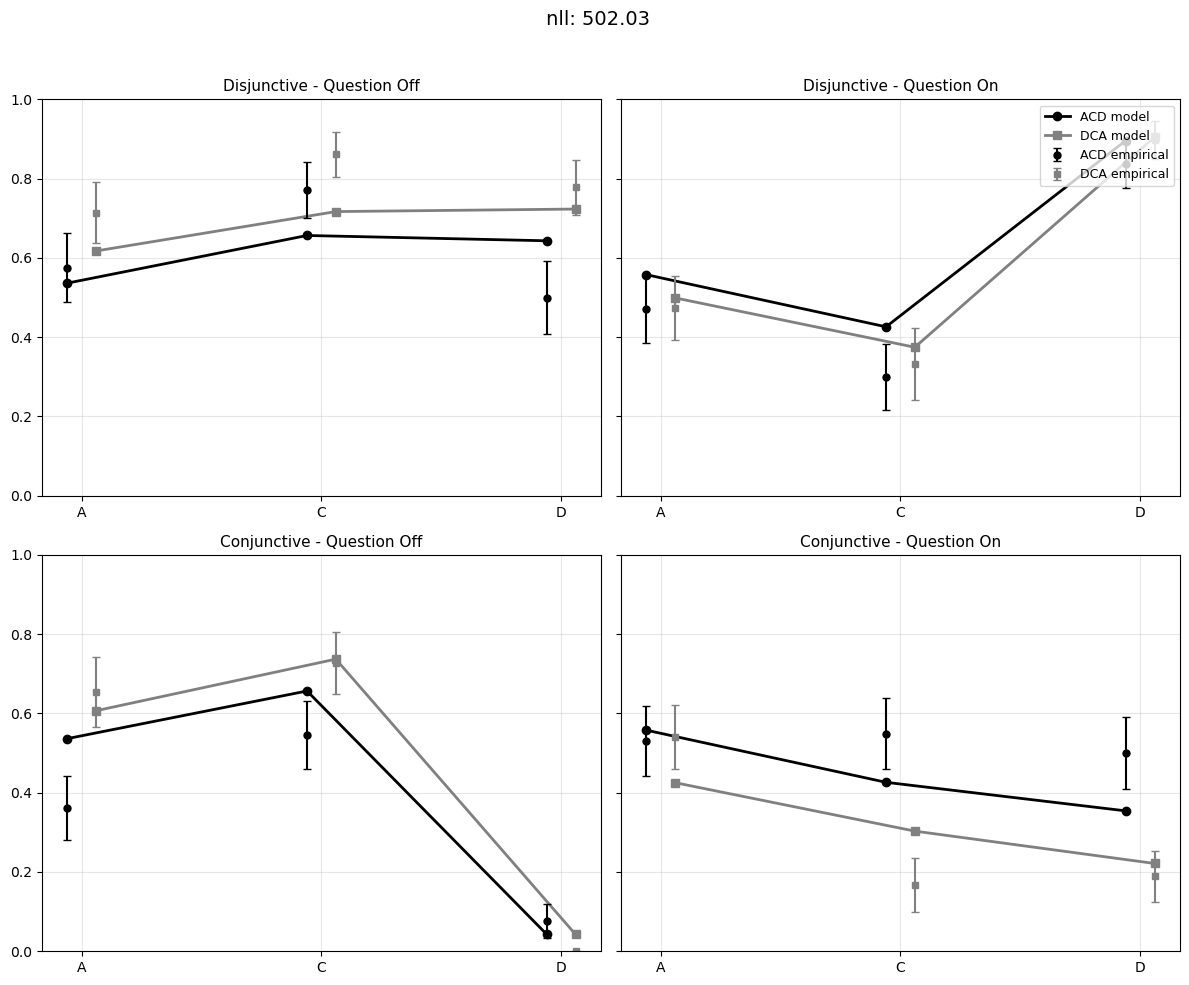

In [22]:
from CfModels.plotting import plot_mle_order_effects_grid
name = 'BC_full'
plot_mle_order_effects_grid(exp2_data,
                            fit_results_bfgs[name],
                            static_twin_with_missing,
                            title_prefix=''
                            )

In [23]:
from CfModels.plotting import compare_order
from CfModels.fitting import make_priors

def get_order_preds(fit):
    params = fit['fitted_params']
    priors = make_priors(params)

    preds = {}
    for disj in [True, False]:
        for ques in [True, False]:
            print(f"Disjunction: {disj}, Question: {ques}")
            order_means = compare_order(beta_A=priors['beta_A'],
                        beta_B=priors['beta_B'],
                        beta_C=priors['beta_C'],
                        beta_D=priors['beta_D'],
                        power_B=priors['theta_AB'],
                        power_C=priors['theta_AC'], 
                            power_D_from_B=priors['theta_BD'],
                            power_D_from_C=priors['theta_CD'],
                        disjunction=disj,
                        question=ques,
                        s=params['s'],
                        p_keep=params['p_keep'],
                        temperature=params['temperature']
                        )
            disj_name = 'Disj' if disj else 'Conj'
            ques_name = 'B1' if ques else 'B0'
            preds[(disj_name, ques_name)] = {
                    'ACD': {'A' : order_means[0]['mean_A'], 'C': order_means[0]['mean_C'], 'D': order_means[0]['mean_D']},
                    'DCA': {'D' : order_means[1]['mean_D'], 'C': order_means[1]['mean_C'], 'A': order_means[1]['mean_A']},
                    }
    return preds


In [24]:
order_preds = get_order_preds(fit_results_bfgs['BC_full'])

Disjunction: True, Question: True
Disjunction: True, Question: False
Disjunction: False, Question: True
Disjunction: False, Question: False


In [25]:
exp2_data.groupby(['structure', 'question','order'])[['A', 'C', 'D']].mean().apply(lambda x: (x + 1) / 2)

A       C       D
structure question order                        
1         0        1      0.5625  0.7375  0.5000
                   2      0.6875  0.8250  0.7500
          1        1      0.4750  0.3500  0.8125
                   2      0.4750  0.3875  0.8875
2         0        1      0.3750  0.5375  0.0875
                   2      0.6125  0.6875  0.0125
          1        1      0.5250  0.5375  0.5000
                   2      0.5375  0.2500  0.2125

In [26]:
from seaborn import color_palette

color_palette("colorblind")  

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

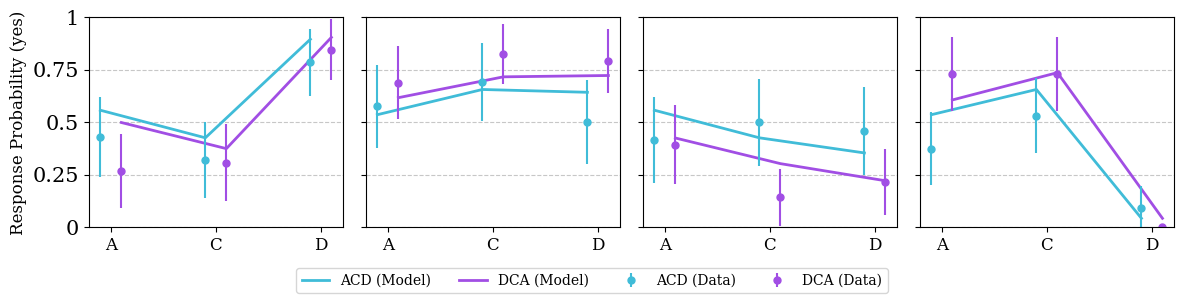

In [27]:
## Model Predictions - Order Effects Grid Plot

def plot_order_predictions_grid(order_pred_dict, exp_data, figsize=(12, 4), non_zero=True, save_fig=False):
    """
    Plot order predictions for all conditions in a 1x4 grid format.
    
    Parameters:
    order_pred_dict: dict with keys like ('Disj', 'B1') containing order predictions
    exp_data: DataFrame containing experimental data
    non_zero: bool, whether to filter out zero responses
    save_fig: bool, whether to save the figure
    """
    
    if non_zero:
        exp_data = exp_data[(exp_data['A'] != 0) & (exp_data['C'] != 0) & (exp_data['D'] != 0)]
    

    # Set text to computer modern
    plt.rcParams.update({"font.family": "serif",
                         "mathtext.fontset": "cm",
                         "font.size": 12})

    # Create figure with 1x4 subplots
    fig, axes = plt.subplots(1, 4, figsize=figsize)  # Increased height slightly for legend
    
    # Define conditions
    conditions = [('Disj', 'B1'), ('Disj', 'B0'), ('Conj', 'B1'), ('Conj', 'B0')]
    condition_titles = ['If $B$ had operated (Disjunctive)', 'If B had not operated (Disjunctive)', 'If $B$ had operated (Conjunctive)', 'If B had not operated (Conjunctive)']
    

    # Colors
    acd_color = '#40BCD8'
    dca_color = '#A14EE4'
    
    # Dodge for overlapping points
    dodge = 0.1
    
    for idx, ((disj_name, ques_name), title) in enumerate(zip(conditions, condition_titles)):
        ax = axes[idx]
        
        # Get model predictions
        if (disj_name, ques_name) in order_pred_dict:
            preds = order_pred_dict[(disj_name, ques_name)]
            
            # Convert condition names to booleans
            disj_bool = disj_name == 'Disj'
            ques_bool = ques_name == 'B1'
            
            # Filter experimental data
            structure_val = 1 if disj_bool else 2
            question_val = 1 if ques_bool else 0
            
            # Get data for each order
            acd_data_exp = exp_data[(exp_data['structure'] == structure_val) & 
                                   (exp_data['question'] == question_val) & 
                                   (exp_data['order'] == 1)]
            dca_data_exp = exp_data[(exp_data['structure'] == structure_val) & 
                                   (exp_data['question'] == question_val) & 
                                   (exp_data['order'] == 2)]
            
            # Calculate empirical means (convert -1,0,1 to 0,0.5,1 scale)
            def transform_response(x):
                return (x + 1) / 2
            
            acd_emp_means = [transform_response(acd_data_exp['A'].mean()),
                            transform_response(acd_data_exp['C'].mean()),
                            transform_response(acd_data_exp['D'].mean())]
            
            dca_emp_means = [transform_response(dca_data_exp['A'].mean()),
                            transform_response(dca_data_exp['C'].mean()),
                            transform_response(dca_data_exp['D'].mean())]
            
            adc_emp_sems = [acd_data_exp['A'].sem(),
                           acd_data_exp['C'].sem(),
                           acd_data_exp['D'].sem()]
            dca_emp_sems = [dca_data_exp['A'].sem(),
                           dca_data_exp['C'].sem(),
                           dca_data_exp['D'].sem()]
            
            # Extract model predictions
            acd_data = preds['ACD']
            dca_data = preds['DCA']
            
            # Create x positions for responses
            responses = ['A', 'C', 'D']
            x_pos = np.arange(len(responses))
            
            # Extract values for plotting
            acd_values = [acd_data[resp] for resp in responses]
            dca_values = [dca_data[resp] for resp in responses]
            
            # Model predictions (solid lines)
            ax.plot(x_pos-dodge, acd_values, color=acd_color, linestyle='-', label='ACD (Model)', linewidth=2)
            ax.plot(x_pos+dodge, dca_values, color=dca_color, linestyle='-', label='DCA (Model)', linewidth=2)
            
            # Empirical data (points with error bars)
            ax.errorbar([x - dodge for x in x_pos], acd_emp_means, yerr=adc_emp_sems, fmt='o', color=acd_color, label='ACD (Data)', markersize=5, linestyle='None', capsize=0)
            ax.errorbar([x + dodge for x in x_pos], dca_emp_means, yerr=dca_emp_sems, fmt='o', color=dca_color, label='DCA (Data)', markersize=5, linestyle='None', capsize=0)
        
        # Formatting
        ax.set_xticks(x_pos)
        ax.set_xticklabels(responses, fontsize=12)
        ax.set_ylim(0, 1)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        # ax.set_title(title, fontsize=8)
        
        # Only show y-axis labels and ticks on the first subplot
        if idx == 0:
            ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
            ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=15)
            ax.set_ylabel('Response Probability (yes)',
                          fontsize=12)
        else:
            ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
            ax.set_yticklabels([])
    
    # Add legend below the subplots with 2 columns
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=10)
    
    plt.tight_layout()
    
    if save_fig:
        plt.savefig('figures/order_predictions_grid.pdf', bbox_inches='tight', pad_inches=0.1)
    
    plt.show()

# Use the function with the existing order_preds data
plot_order_predictions_grid(order_preds, exp2_data, figsize=(12, 2.8), non_zero=True, save_fig=0)